# SVM Regression

SVM 알고리즘은 다목적으로 사용할 수 있다.  
선형, 비선형 분류 뿐만 아니라, 선형, 비선형 회귀에도 사용할 수 있다.  

SVM을 회귀에 적용하는 방법은, 목표를 반대로 하는 것이다.

회귀의 목표는 분류의 목표와 반대이다.  

결정경계의 마진을 최대한 크게 하고, 마진 안으로 회귀 데이터가 최대한 많이 들어가도록 학습하는 것이다.  
마진 폭은 epsilon 이라는 하이퍼파라미터를 사용하여 조절한다.   
epsilon 을 지나치게 크게 하면 underfit 될 수 있다. (epsilon의 기본값은 0.1이다.)

![svr](../../data/svr.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## SVM 으로 선형회귀

In [2]:
# 다음과 같은 샘플데이터를 생성한다.
np.random.seed(42)

m = 50

X1 = 2 * np.random.rand(m,1)

y1 = (4+3*X1+np.random.randn(m,1)).ravel()

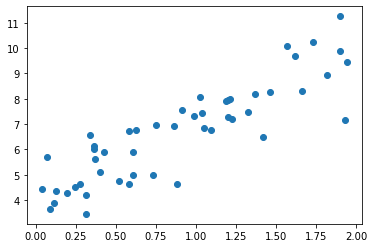

In [3]:
plt.plot(X1, y1, 'o')
plt.show()

In [5]:
?SVR

In [13]:
from sklearn.svm import SVR

svm_reg =SVR(kernel='linear', epsilon=0.1)

svm_reg.fit(X1,y1)

SVR(kernel='linear')

In [14]:
svm_reg.coef_, svm_reg.intercept_

(array([[2.73182722]]), array([4.23512437]))

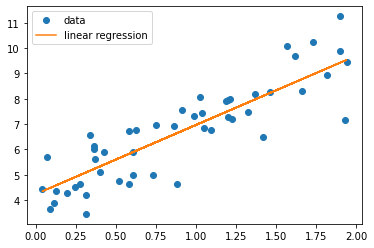

In [15]:
# 생성된 선형회귀 모형을 시각화 한다.

pred = svm_reg.predict(X1)

plt.plot(X1, y1, 'o', label='data')
plt.plot(X1, pred, '-', label='linear regression')
plt.legend()

plt.show()

### 비선형적 회귀모형의 생성

In [19]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [20]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

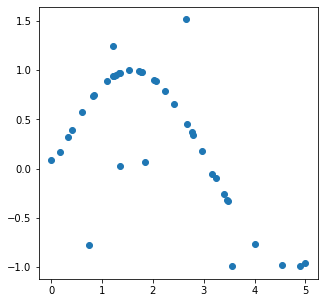

In [21]:
plt.figure(figsize=(5, 5))
plt.plot(X, y, 'o')
plt.show()

비선형 회귀 모형을 생성하기 위해서 kernel 옵션을 사용한다.  
`'rbf', 'linear', 'poly'` 로 설정하고 생성된 회귀 모형을 비교하여 보자.

In [31]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

In [32]:
?SVR

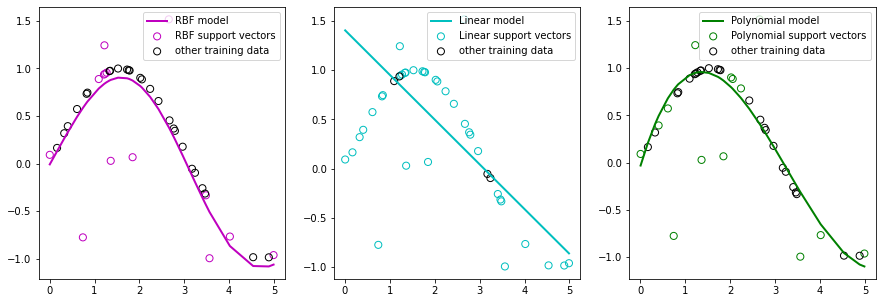

In [33]:
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend()

plt.show()

## 실습하기 

1. 다음과 같이 샘플 데이터셋을 읽어 들이시오.
```
from sklearn.datasets import load_boston
data = load_boston()
x = data.data
y = data.target
```

2. 읽어들인 보스턴 집값을 예측하는 SVM 모형을 생성하시오.
3. 생성된 모형을 평가하시오.